In [ ]:
from pathlib import Path
from functools import partial
import numpy as np
import seaborn as sns
from scipy import integrate
from matplotlib import pyplot as plt

sns.set_theme()
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
        "figure.dpi": 150,
    }
)

IMAGES_DIR = Path("../../content/figures")

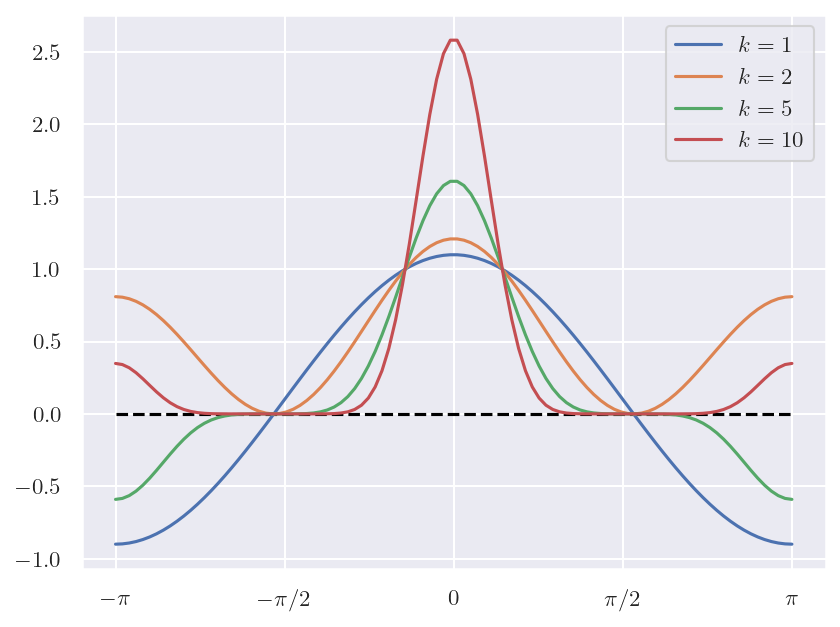

In [19]:
epsilon = 0.1


def t(theta: np.ndarray, k: int = 1) -> np.ndarray:

    return (epsilon + np.cos(theta)) ** k


fig, ax = plt.subplots(1, 1)
theta = np.linspace(-np.pi, np.pi, 100)
y = t(theta)
ax.hlines(
    0,
    xmin=-np.pi,
    xmax=np.pi,
    colors="black",
    linestyles="--",
)

for k in [1, 2, 5, 10]:
    ax.plot(theta, t(theta, k), label=f"$k = {k}$")

ax.set_xticks(
    [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
    labels=["$-\pi$", "$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"],
)

ax.legend()

plt.savefig(
    IMAGES_DIR / "sequence-of-trigonometric-polynomials.png",
    bbox_inches="tight",
)

## Good Kernels


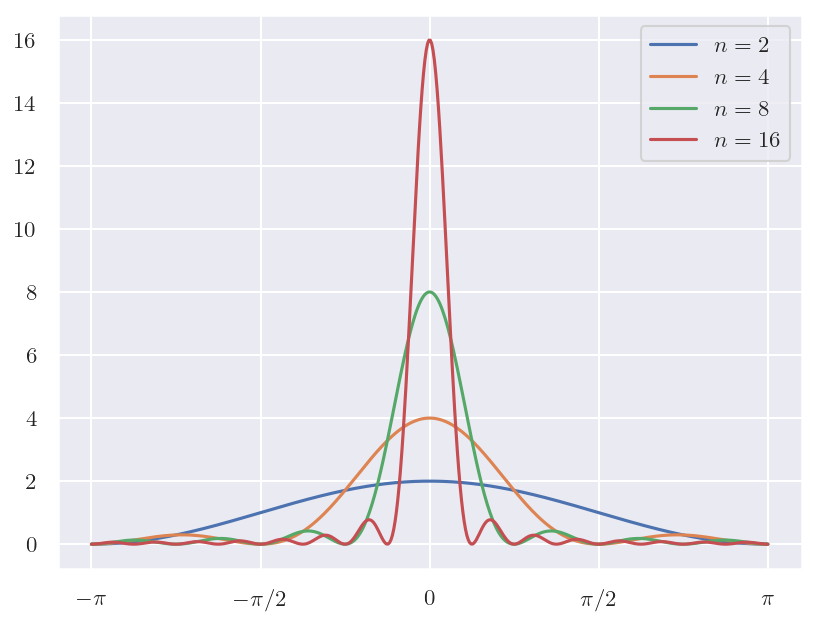

In [ ]:
def fejer_kernel(x, n):
    """Compute the Fejér kernel for a given x (NumPy array) and order n."""
    # Initialize output array
    y = np.zeros_like(x, dtype=np.float64)

    # Handle x != 0 cases using vectorized operations
    mask = x != 0
    y[mask] = (1 / n) * (np.sin(n * x[mask] / 2) / np.sin(x[mask] / 2)) ** 2

    # Handle x == 0 separately (where sin(x/2) = 0)
    y[~mask] = n

    return y


x = np.linspace(-np.pi, np.pi, 500)
n = 10
fig, ax = plt.subplots(1, 1)

for n in [2, 4, 8, 16]:
    ax.plot(x, fejer_kernel(x, n), label=f"$n = {n}$")

ax.legend()

ax.set_xticks(
    [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
    labels=["$-\pi$", "$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"],
)

plt.savefig(
    IMAGES_DIR / "family-of-good-kernels.png",
    bbox_inches="tight",
)

## Direchlet Kernels


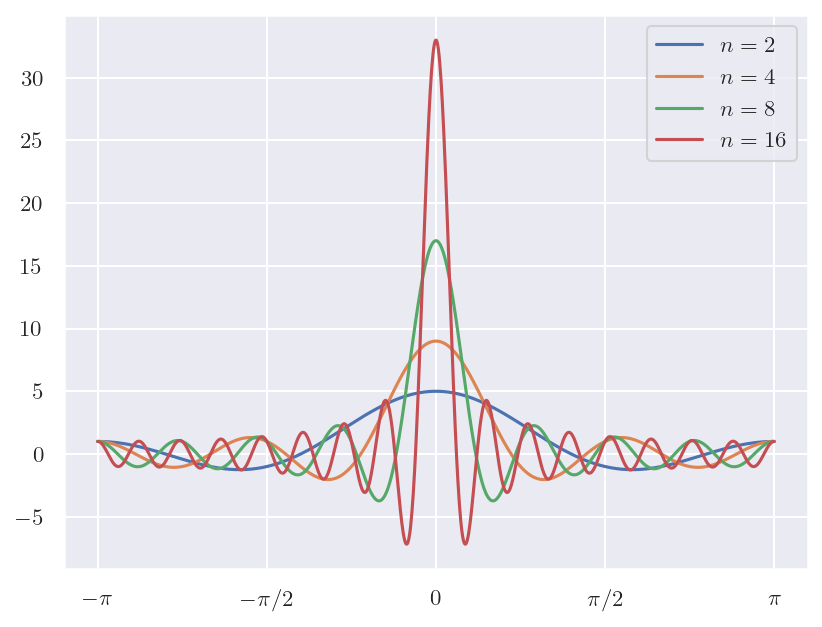

In [4]:
def dirichet(x: np.ndarray, n: int) -> np.ndarray:

    return np.real(
        np.sum(
            [np.exp(k * 1j * x) for k in range(-n, n + 1)],
            axis=0,
        )
    )


x = np.linspace(-np.pi, np.pi, 1000)


fig, ax = plt.subplots(1, 1)


for n in [2, 4, 8, 16]:
    ax.plot(x, dirichet(x, n), label=f"$n = {n}$")

ax.legend()

ax.set_xticks(
    [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
    labels=["$-\pi$", "$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"],
)


plt.savefig(
    IMAGES_DIR / "dirichlet-kernels.png",
    bbox_inches="tight",
)